In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [3]:
df = pd.read_csv('./data/smart_phone_raw_data.csv')
print(df.shape)
df.head(3)

(28575, 179)


,ID,DM1,DM2,DM3,DM4,KK1,KK2,WT,Q1A_1,Q1A_2,...,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21
0,1,3,1,NaN,1,3,NaN,1581.361297,1,1,...,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0
1,2,3,2,NaN,1,3,NaN,1506.828478,1,1,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0
2,3,2,1,3.0,1,2,2.0,1380.620423,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
media_df = df[['Q16_1','Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17_1','Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7', 'KK1']]

In [5]:
danger_df=dict(list(media_df.groupby(['KK1'])))
data=danger_df[1.0]

# 3번 방법

In [6]:
data2 = data.drop(['KK1'], axis=1)

In [7]:
data2

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7
98,4,2,3,3,2,2,3,3,3,3,2,4,3,2,2,2
138,1,1,1,1,1,1,3,3,1,3,3,4,3,3,3,3
139,3,2,1,2,1,1,3,3,1,3,3,4,3,3,3,3
143,1,1,1,1,1,1,3,3,1,4,4,4,4,4,4,4
155,1,1,1,1,1,1,3,3,1,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,3,4,4,3,4,4,2,3,3,4,3,3,4,4,2,3
28440,4,3,3,1,3,2,2,2,1,3,3,1,2,2,2,2
28457,3,4,3,3,4,4,3,3,3,3,4,3,3,2,3,3
28458,3,4,4,3,4,4,4,2,3,4,3,3,4,2,3,3


### 요인성 평가
- 데이터 세트에서 요인을 찾을 수 있는지 확인

1) bartlett의 테스트
- p 값이 0.05 미만이면 적합한 데이터

In [10]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=128e69c3b43f32d3e1fe5b59d03d758eb75ed21c506cf4dff79a25a872436729
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [11]:
from factor_analyzer import FactorAnalyzer

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi, p = calculate_bartlett_sphericity(data2)
chi, p

(4320.304019774707, 0.0)

2) KMO 검정
- 0.6미만이면 부적절, 0.8이상이면 우수

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo1,kmo2 = calculate_kmo(data2)
kmo2

0.90445273010676

In [14]:
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(data2)

# Eigen값 확인
ev, v = fa.get_eigenvalues()
ev

array([5.28412579, 2.77308716, 1.05639584, 0.79512165, 0.68829837,
       0.63829834, 0.61282003, 0.58324075, 0.52755074, 0.51117773,
       0.49782752, 0.47424017, 0.42142186, 0.41648509, 0.37969062,
       0.34021835])

###  Eigen값 확인
- Eigen값이 1이상일때 까지 or 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화
- 3개로 나누어주는 것이 최선

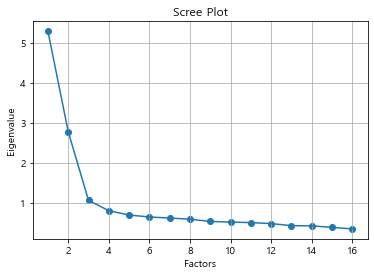

In [15]:
plt.scatter(range(1,data2.shape[1]+1),ev)
plt.plot(range(1,data2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [16]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax") 
fa.fit(data2)
efa_result= pd.DataFrame(fa.loadings_, index=data2.columns)
efa_result

,0,1,2
Q16_1,0.693440,-0.013448,0.229945
Q16_2,0.728564,0.068521,0.219779
Q16_3,0.706355,0.085299,0.044396
Q16_4,0.680761,0.141884,-0.097505
Q16_5,0.751169,0.122194,0.050108
Q16_6,0.655843,0.175658,0.044293
Q16_7,0.122627,0.329490,0.575938
Q16_8,0.137382,0.362570,0.549948
Q16_9,0.304142,0.398016,0.247922
Q17_1,0.059019,0.463683,0.607234


<AxesSubplot:>

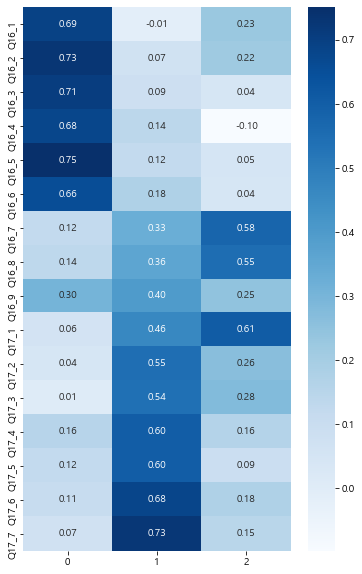

In [17]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

### 신뢰도 분석
- 설문조사시 비슷한 문항에 대해 반대의 응답을 하지는 않았는지 확인
- 크론바흐 알파 계수가 0.7 이상이면 신뢰할만하다고 판단

In [19]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [20]:
factors_items_dict = {'digital':['Q16_1','Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6'],
                     'family':['Q16_7', 'Q16_8'],
                     'life':['Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7']}

In [21]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(data2[value]))
    print()

digital
0.8592369219956965

family
0.6402205842161628

life
0.8137537736483537



- family는 신뢰도도 낮고 요인 분리가 제대로 수행되지 않으므로 제거

In [37]:
data3 = data.drop(['Q16_9','Q17_1','KK1'], axis=1)

In [38]:
data3

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7
98,4,2,3,3,2,2,3,3,2,4,3,2,2,2
138,1,1,1,1,1,1,3,3,3,4,3,3,3,3
139,3,2,1,2,1,1,3,3,3,4,3,3,3,3
143,1,1,1,1,1,1,3,3,4,4,4,4,4,4
155,1,1,1,1,1,1,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,3,4,4,3,4,4,2,3,3,3,4,4,2,3
28440,4,3,3,1,3,2,2,2,3,1,2,2,2,2
28457,3,4,3,3,4,4,3,3,4,3,3,2,3,3
28458,3,4,4,3,4,4,4,2,3,3,4,2,3,3


In [39]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi, p = calculate_bartlett_sphericity(data3)
chi, p

(3604.088960883781, 0.0)

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo1,kmo2 = calculate_kmo(data3)
kmo2

0.8877938822603308

In [41]:
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa.fit(data3)

# Eigen값 확인
ev, v = fa.get_eigenvalues()
ev

array([4.63126395, 2.63764196, 0.9748492 , 0.70886543, 0.67075524,
       0.60790358, 0.58254988, 0.56178816, 0.50888889, 0.50198447,
       0.46671896, 0.41915092, 0.37981624, 0.34782312])

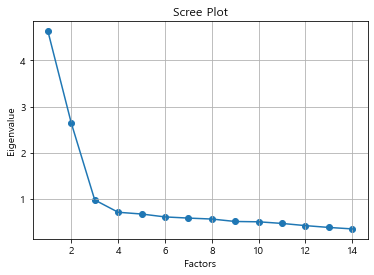

In [42]:
plt.scatter(range(1,data3.shape[1]+1),ev)
plt.plot(range(1,data3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [43]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax") 
fa.fit(data3)
efa_result= pd.DataFrame(fa.loadings_, index=data3.columns)
efa_result

,0,1,2
Q16_1,0.695630,-0.000833,0.227114
Q16_2,0.730925,0.080138,0.215174
Q16_3,0.705632,0.079504,0.052911
Q16_4,0.674634,0.120615,-0.084527
Q16_5,0.757834,0.120584,0.025134
Q16_6,0.656580,0.170674,0.021599
Q16_7,0.123893,0.371830,0.541653
Q16_8,0.136771,0.398040,0.537427
Q17_2,0.050905,0.576065,0.248691
Q17_3,0.022099,0.564353,0.218398


<AxesSubplot:>

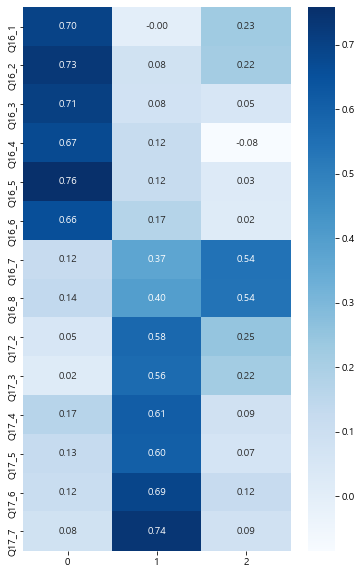

In [44]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

- Q16_1~Q16_6이 디지털 사용 역량
- Q16_7~Q16_8이 가족과의 관계
- Q17_2~Q17_7이 삶의 만족도로 묶이는 것을 확인